In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [32]:
# Inspect the data
print("Training data:")
print(train_data.head())
print("\nTest data:")
print(test_data.head())

Training data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   20

In [33]:
# Check for missing values in train data
print("\nMissing values in training data:")
print(train_data.isnull().sum())


Missing values in training data:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [34]:
# Fill missing values with the mean for numerical columns in training data
train_data['GrLivArea'].fillna(train_data['GrLivArea'].mean(), inplace=True)
train_data['BedroomAbvGr'].fillna(train_data['BedroomAbvGr'].mean(), inplace=True)
train_data['FullBath'].fillna(train_data['FullBath'].mean(), inplace=True)
train_data['SalePrice'].fillna(train_data['SalePrice'].mean(), inplace=True)

C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\3298881735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['GrLivArea'].fillna(train_data['GrLivArea'].mean(), inplace=True)
C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\3298881735.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [35]:
# Define features (X) and target variable (y) for training data
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = train_data['SalePrice']

In [36]:
# Check the shapes of the data
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (1460, 3)
Shape of y_train: (1460,)


In [37]:
# Define features (X) for test data
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

In [38]:
# Fill missing values with the mean for numerical columns in test data
X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(), inplace=True)
X_test['BedroomAbvGr'].fillna(X_test['BedroomAbvGr'].mean(), inplace=True)
X_test['FullBath'].fillna(X_test['FullBath'].mean(), inplace=True)

C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\50701442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(), inplace=True)
C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\50701442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(),

In [39]:
# Fill missing values with the mean for numerical columns in test data
X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(), inplace=True)
X_test['BedroomAbvGr'].fillna(X_test['BedroomAbvGr'].mean(), inplace=True)
X_test['FullBath'].fillna(X_test['FullBath'].mean(), inplace=True)

C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\50701442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(), inplace=True)
C:\Users\vslkm\AppData\Local\Temp\ipykernel_22008\50701442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GrLivArea'].fillna(X_test['GrLivArea'].mean(),

In [40]:
# Check the shape of the test data
print(f"\nShape of X_test: {X_test.shape}")


Shape of X_test: (1459, 3)


In [41]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict on training data to evaluate
y_pred_train = model.predict(X_train)

In [43]:
# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

In [44]:
print(f'\nTraining MSE: {train_mse}')
print(f'Training R2 Score: {train_r2}')


Training MSE: 2628535155.618378
Training R2 Score: 0.5832212987566321


In [45]:
# Cross-validation to get a better sense of model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

In [46]:
print(f'\nCross-Validation RMSE scores: {cv_rmse}')
print(f'Mean Cross-Validation RMSE: {cv_rmse.mean()}')


Cross-Validation RMSE scores: [45764.13061619 51165.96375852 53790.96176106 45646.19437475
 60896.24579247]
Mean Cross-Validation RMSE: 51452.6992605972


In [47]:
# Predict on test data
y_pred_test = model.predict(X_test)

In [48]:
# Print the predictions for the test set
print("\nPredictions on test data:")
print(y_pred_test)


Predictions on test data:
[120100.81297664 139898.20827909 202611.4145861  ... 100482.39478483
 100386.04850582 243444.31507603]


In [49]:
# Optionally, save the predictions to a CSV file
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_test})
output.to_csv('house_predictions.csv', index=False)
print("\nPredictions saved to house_predictions.csv")


Predictions saved to house_predictions.csv


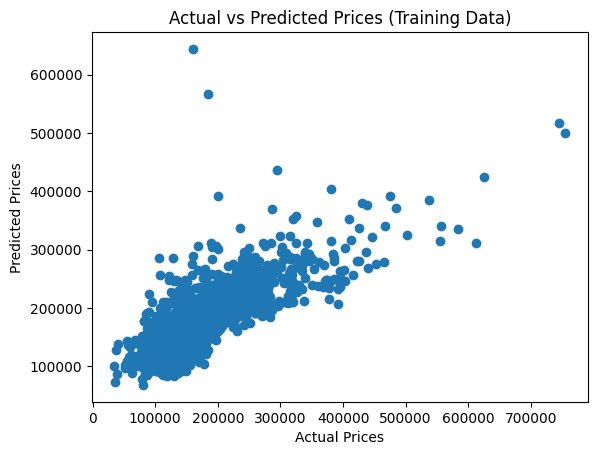

In [50]:
# Visualize the results on training data
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Training Data)')
plt.show()